In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data=pd.read_csv('..\\datasets\\Car-Price-Predict\\cardekho.csv')
#https://www.kaggle.com/datasets/sukhmandeepsinghbrar/car-price-prediction-dataset/data

In [3]:
raw_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


In [4]:
raw_data.fuel=raw_data.fuel.map({'Diesel':0,'Petrol':1,'LPG':2,'CNG':3})

In [5]:
raw_data.seller_type=raw_data.seller_type.map({'Individual':0,'Dealer':1,'Trustmark Dealer':2})

In [6]:
raw_data.transmission=raw_data.transmission.map({'Manual':0,'Automatic':1})

In [7]:
raw_data.owner=raw_data.owner.map({'First Owner':0, 'Second Owner':1, 'Third Owner':2,'Fourth & Above Owner':3, 'Test Drive Car':4})

In [8]:
raw_data['max_power']=raw_data['max_power'].replace(' ',np.nan)
raw_data['max_power']=raw_data['max_power'].astype(float)

In [9]:
raw_data.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             216
seats                 221
dtype: int64

In [10]:
raw_data=raw_data.dropna()

In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                7906 non-null   object 
 1   year                7906 non-null   int64  
 2   selling_price       7906 non-null   int64  
 3   km_driven           7906 non-null   int64  
 4   fuel                7906 non-null   int64  
 5   seller_type         7906 non-null   int64  
 6   transmission        7906 non-null   int64  
 7   owner               7906 non-null   int64  
 8   mileage(km/ltr/kg)  7906 non-null   float64
 9   engine              7906 non-null   float64
 10  max_power           7906 non-null   float64
 11  seats               7906 non-null   float64
dtypes: float64(4), int64(7), object(1)
memory usage: 803.0+ KB


In [12]:
raw_data=raw_data.rename(columns={"mileage(km/ltr/kg)":"efficiency"})

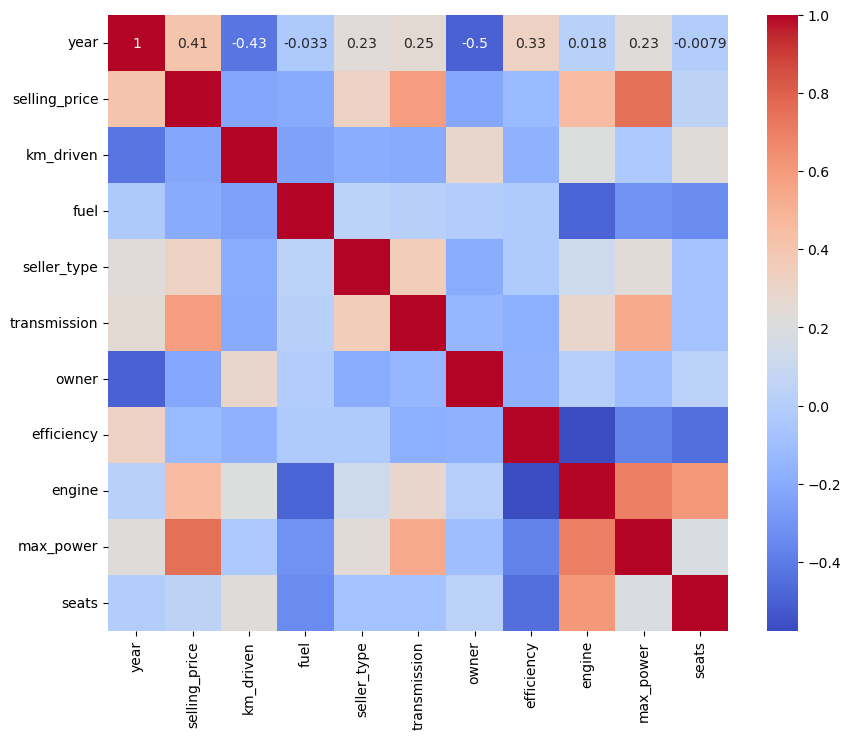

In [13]:
plt.figure(figsize=(10,8))
correlation=raw_data.corr(numeric_only=True)
sns.heatmap(correlation,cmap="coolwarm",annot=True)
plt.show()

In [14]:
x=np.array(raw_data[['year','seller_type','transmission','engine','max_power']])
y=np.array(raw_data['selling_price'])

In [15]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#scaler.fit(x)
#x=scaler.transform(x)

In [16]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [17]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [18]:
ypred=model.predict(xtest)

In [19]:
model.score(xtest,ytest)

0.969111516158766

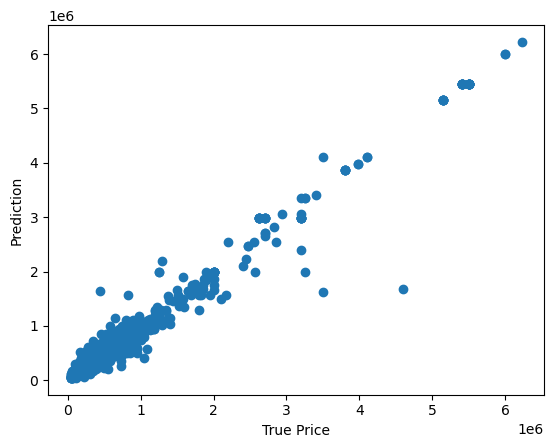

In [20]:
plt.scatter(ytest,ypred)
plt.xlabel('True Price')
plt.ylabel('Prediction')
plt.show()